In [24]:
import pandas as pd
import numpy as np
import random as rnd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
train = pd.read_csv('train.csv')
#train.shape  (891,12)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test = pd.read_csv('test.csv')
#test.shape (418,11)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
combined = train.append(test)
combined.set_index(['PassengerId'], inplace = True)
combined

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [11]:
#resetting indexes
train.set_index(['PassengerId'], inplace = True)
test.set_index(['PassengerId'], inplace = True)

KeyError: ignored

In [13]:
#train.head()
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
#missing values
#train.dtypes
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [15]:
test.isnull().sum()
#test.dtypes

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [16]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Emanuel, Miss. Virginia Ethel",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


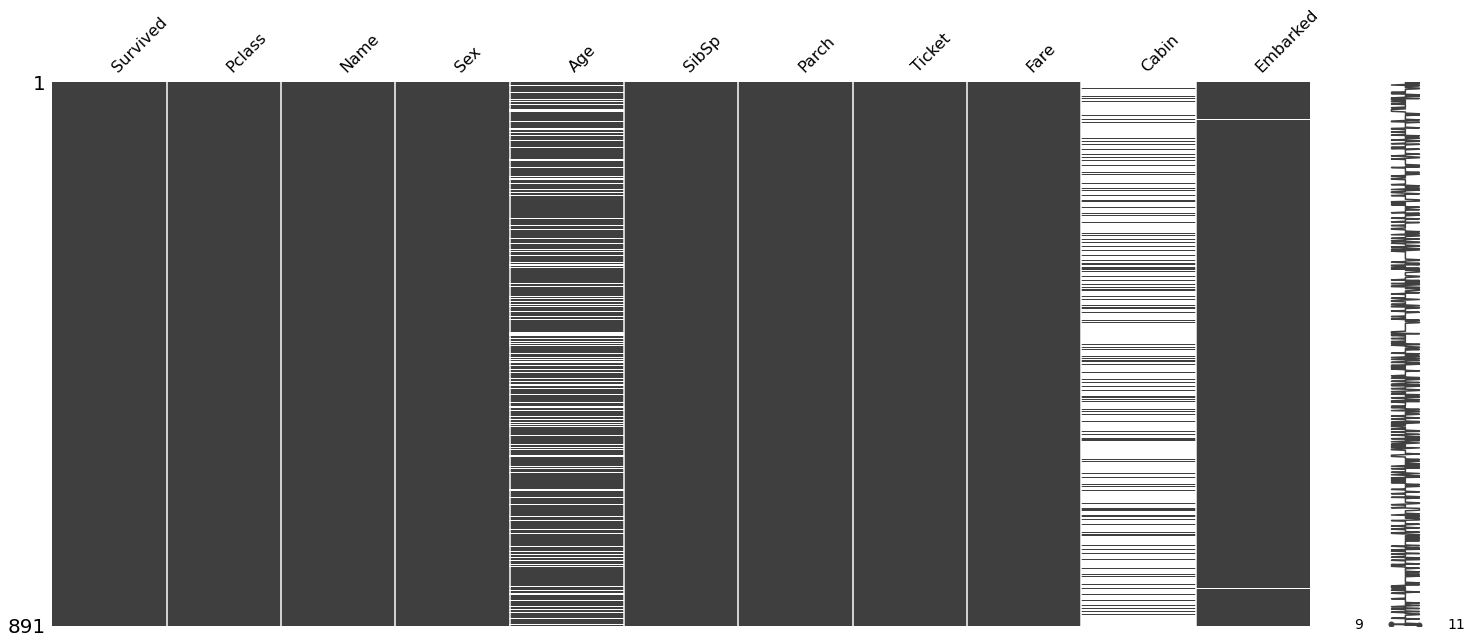

In [17]:
#visualising NAn
import missingno as mn
mn.matrix(train)

AttributeError: ignored

In [28]:
#analysing features
##passengers in 1st class survived the most##
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [29]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean()
## 74% who survived are females ##

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [32]:
train[['Age', 'Survived']].groupby(['Age'], as_index = False).mean()

,Age,Survived
0,0.42,1.0
1,0.67,1.0
2,0.75,1.0
3,0.83,1.0
4,0.92,1.0
...,...,...
83,70.00,0.0
84,70.50,0.0
85,71.00,0.0
86,74.00,0.0


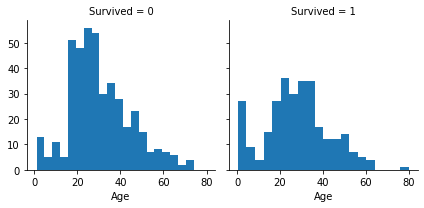

In [33]:
#visualising age
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [34]:
#planning to consider Age, Sex, Embarked, Pclass as features

In [35]:
#we dont need cabin, tickets
train = train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)

In [38]:
train.shape
#test.shape

(891, 9)

In [40]:
combined = [train, test]
combined

[             Survived  Pclass  ...     Fare Embarked
 PassengerId                    ...                  
 1                   0       3  ...   7.2500        S
 2                   1       1  ...  71.2833        C
 3                   1       3  ...   7.9250        S
 4                   1       1  ...  53.1000        S
 5                   0       3  ...   8.0500        S
 ...               ...     ...  ...      ...      ...
 887                 0       2  ...  13.0000        S
 888                 1       1  ...  30.0000        S
 889                 0       3  ...  23.4500        S
 890                 1       1  ...  30.0000        C
 891                 0       3  ...   7.7500        Q
 
 [891 rows x 9 columns],              Pclass  ... Embarked
 PassengerId          ...         
 892               3  ...        Q
 893               3  ...        S
 894               2  ...        Q
 895               3  ...        S
 896               3  ...        S
 ...             ...  ...  

In [41]:
#extracting new features
for data in combined:
  data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [47]:
for data in combined:
  data['Title'] = data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col',\
                                         'Don', 'Dr', 'Major', 'Sir', 'Jonkheer',\
                                         'Dona','Rev'], 'Rare')
  data['Title'] = data['Title'].replace('Mlle', 'Miss')
  data['Title'] = data['Title'].replace('Ms', 'Miss')
  data['Title'] = data['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index = False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [48]:
#mapping and adding to main dataframe
mapping = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5}
for data in combined:
  data['Title'] = data['Title'].map(mapping)
  data['Title'] = data['Title'].fillna(0)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [49]:
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)
combined = [train, test]
train.shape, test.shape

((891, 9), (418, 8))

In [51]:
train.head()
#Name is dropped

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,1
2,1,1,female,38.0,1,0,71.2833,C,3
3,1,3,female,26.0,0,0,7.9250,S,2
4,1,1,female,35.0,1,0,53.1000,S,3
5,0,3,male,35.0,0,0,8.0500,S,1


In [52]:
#Sex male=0, female=1
for data in combined:
  data['Sex'] = data['Sex'].map({'female':1, 'male':0}).astype(int)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,S,1
2,1,1,1,38.0,1,0,71.2833,C,3
3,1,3,1,26.0,0,0,7.9250,S,2
4,1,1,1,35.0,1,0,53.1000,S,3
5,0,3,0,35.0,0,0,8.0500,S,1


In [59]:
#category to numerical
freq_port = train.Embarked.dropna().mode()[0]
freq_port

'S'

In [60]:

for dataset in combined:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [61]:

for dataset in combined:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,0,1
2,1,1,1,38.0,1,0,71.2833,1,3
3,1,3,1,26.0,0,0,7.9250,0,2
4,1,1,1,35.0,1,0,53.1000,0,3
5,0,3,0,35.0,0,0,8.0500,0,1


In [69]:
#age feature has lot of Nans
#Pclass x Gender combinations
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [70]:

for dataset in combined:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,
1,0,3,0,22,1,0,7.2500,0,1
2,1,1,1,38,1,0,71.2833,1,3
3,1,3,1,26,0,0,7.9250,0,2
4,1,1,1,35,1,0,53.1000,0,3
5,0,3,0,35,0,0,8.0500,0,1


In [71]:

for dataset in combined:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,
1,0,3,0,1,1,0,7.2500,0,1
2,1,1,1,2,1,0,71.2833,1,3
3,1,3,1,1,0,0,7.9250,0,2
4,1,1,1,2,1,0,53.1000,0,3
5,0,3,0,2,0,0,8.0500,0,1


In [73]:
for dataset in combined:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [74]:

for dataset in combined:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [75]:

train = train.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test = test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combined = [train, test]

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
PassengerId,,,,,,,,
1,0,3,0,1,7.2500,0,1,0
2,1,1,1,2,71.2833,1,3,0
3,1,3,1,1,7.9250,0,2,1
4,1,1,1,2,53.1000,0,3,0
5,0,3,0,2,8.0500,0,1,1


In [76]:
train = train.drop(['Fare'], axis=1)
test = test.drop(['Fare'], axis=1)
combined = [train, test]

In [77]:
test.head(10)

,Pclass,Sex,Age,Embarked,Title,IsAlone
PassengerId,,,,,,
892,3,0,2,2,1,1
893,3,1,2,0,3,0
894,2,0,3,2,1,1
895,3,0,1,0,1,1
896,3,1,1,0,3,0
897,3,0,0,0,1,1
898,3,1,1,2,2,1
899,2,0,1,0,1,0
900,3,1,1,1,3,1


In [78]:
train.head()

,Survived,Pclass,Sex,Age,Embarked,Title,IsAlone
PassengerId,,,,,,,
1,0,3,0,1,0,1,0
2,1,1,1,2,1,3,0
3,1,3,1,1,0,2,1
4,1,1,1,2,0,3,0
5,0,3,0,2,0,1,1


In [79]:
#predicting with existing features

X_train = train.drop('Survived', axis=1)
Y_train = train['Survived']
X_test = test.copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 6), (891,), (418, 6))

In [80]:
#prediction using logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc = round(logreg.score(X_train, Y_train)*100, 2)
acc

78.11

In [81]:
#using random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_ran = round(random_forest.score(X_train, Y_train)*100, 2)
acc_ran

84.29

In [84]:
submission = pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived':Y_pred})
submission.to_csv('submission.csv', index=False)

KeyError: ignored